<a href="https://colab.research.google.com/github/RPM247/Change-Detection-using-Satellite-Images/blob/main/Gujarat_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio geopandas matplotlib numpy torch torchvision segmentation-models-pytorch earthengine-api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 11.5 MB/s eta 0:00:00


In [ ]:
# import ee
# import geemap
# import os

# try:
#     ee.Initialize(project='satellite-change-detection')
# except:
#     ee.Authenticate()
#     ee.Initialize(project='satellite-change-detection')

# gujarat = ee.FeatureCollection("FAO/GAUL/2015/level2") \
#     .filter(ee.Filter.eq('ADM1_NAME', 'Gujarat'))

# districts = gujarat.aggregate_array('ADM2_NAME').getInfo()
# years = range(2017, 2026) # 2017 to 2025

# def get_clean_image(roi, year):
#     return (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
#             .filterBounds(roi)
#             .filterDate(f'{year}-01-01', f'{year}-03-30')
#             .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
#             .median()
#             .select(['B4', 'B3', 'B2', 'B8'])
#             .clip(roi)
#             .unmask(0)
#             .toUint16())

# print(f"🚀 Starting Batch Export for {len(districts)} districts...")

# for district_name in districts:
#     roi = gujarat.filter(ee.Filter.eq('ADM2_NAME', district_name)).geometry()

#     for year in years:
#         task_name = f"{district_name}_{year}"
#         print(f"   PLEASE WAIT... Submitting Task: {task_name}")

#         image = get_clean_image(roi, year)

#         task = ee.batch.Export.image.toDrive(
#             image=image,
#             description=task_name,
#             folder='Gujarat_Satellite_Data',
#             region=roi,
#             scale=20,
#             crs='EPSG:4326',
#             maxPixels=1e13
#         )
#         task.start()

# print("\n✅ All tasks submitted to Google Earth Engine!")
# print("👀 Go to https://code.earthengine.google.com/tasks to watch progress.")
# print("📁 Files will appear in your Google Drive folder 'Gujarat_Satellite_Data'.")

import ee
import geemap

try:
    ee.Initialize(project='satellite-change-detection')
except:
    ee.Authenticate()
    ee.Initialize(project='satellite-change-detection')

gujarat_districts = ee.FeatureCollection("FAO/GAUL/2015/level2") \
    .filter(ee.Filter.eq('ADM1_NAME', 'Gujarat'))

district_names = gujarat_districts.aggregate_array('ADM2_NAME').getInfo()
years = range(2017, 2026)

print(f"Found {len(district_names)} districts covering the whole state.")
print(f"Scheduling exports for years: {list(years)}")

def get_clean_image(roi, year):
    return (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
            .filterBounds(roi)
            .filterDate(f'{year}-01-01', f'{year}-02-20')
            .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
            .median()
            .select(['B4', 'B3', 'B2', 'B8'])
            .clip(roi)
            .unmask(0)
            .toUint16())

print("\n🚀 Starting Batch Export...")

task_count = 0

for district in district_names:
    roi = gujarat_districts.filter(ee.Filter.eq('ADM2_NAME', district)).geometry()

    for year in years:
        task_name = f"{district}_{year}_10m"
        print(f"   PLEASE WAIT... Submitting: {task_name}")

        image = get_clean_image(roi, year)

        task = ee.batch.Export.image.toDrive(
            image=image,
            description=task_name,
            folder='Gujarat_Satellite_Data_10m',
            region=roi,
            scale=10,
            crs='EPSG:4326',
            maxPixels=1e13,
            formatOptions={
                'cloudOptimized': True,
                'noData': 0
            }
        )
        task.start()
        task_count += 1

print(f"\n✅ SUCCESS: {task_count} tasks submitted!")
print("👀 Go to https://code.earthengine.google.com/tasks to check progress.")
print("☕ This will take 48-72 hours to complete. You can close this tab now.")

🌍 Found 25 districts covering the whole state.
🗓️  Scheduling exports for years: [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]

🚀 Starting Batch Export...
   PLEASE WAIT... Submitting: Bharuch_2017_10m
   PLEASE WAIT... Submitting: Bharuch_2018_10m
   PLEASE WAIT... Submitting: Bharuch_2019_10m
   PLEASE WAIT... Submitting: Bharuch_2020_10m
   PLEASE WAIT... Submitting: Bharuch_2021_10m
   PLEASE WAIT... Submitting: Bharuch_2022_10m
   PLEASE WAIT... Submitting: Bharuch_2023_10m
   PLEASE WAIT... Submitting: Bharuch_2024_10m
   PLEASE WAIT... Submitting: Bharuch_2025_10m
   PLEASE WAIT... Submitting: Junagadh_2017_10m
   PLEASE WAIT... Submitting: Junagadh_2018_10m
   PLEASE WAIT... Submitting: Junagadh_2019_10m
   PLEASE WAIT... Submitting: Junagadh_2020_10m
   PLEASE WAIT... Submitting: Junagadh_2021_10m
   PLEASE WAIT... Submitting: Junagadh_2022_10m
   PLEASE WAIT... Submitting: Junagadh_2023_10m
   PLEASE WAIT... Submitting: Junagadh_2024_10m
   PLEASE WAIT... Submitting:

In [ ]:
# Code to stop or terminate requested tasks/processes on Google Earth Engine
import ee

try:
    ee.Initialize(project='satellite-change-detection')
except:
    ee.Authenticate()
    ee.Initialize(project='satellite-change-detection')

print("🔄 Fetching task list...")
tasks = ee.batch.Task.list()

cancelled_count = 0

for task in tasks:
    if task.state in ['READY', 'RUNNING']:
        print(f"   ❌ Cancelling: {task.id} - {task.config['description']}")
        task.cancel()
        cancelled_count += 1
    elif task.state in ['COMPLETED', 'FAILED', 'CANCELLED']:
        pass

if cancelled_count > 0:
    print(f"\n✅ Successfully cancelled {cancelled_count} tasks.")
else:
    print("\n✅ No active tasks found to cancel.")

🔄 Fetching task list...
   ❌ Cancelling: L6OZGJ5ECLGLD5U32TNPDUJY - Navsari_2025
   ❌ Cancelling: YPIJVKRUPM6LF33SDBHYGPEQ - Navsari_2024
   ❌ Cancelling: S5HDXNLD6UW3UMOENJRIKXTH - Navsari_2023
   ❌ Cancelling: XIHRCYX25G4L66YDJOI6KKJX - Navsari_2022
   ❌ Cancelling: 3K6A7Y7F5NNNZ3UZDM72IRTF - Navsari_2021
   ❌ Cancelling: DY6I5MC3HRHPHZ7ZQ73VLK2R - Navsari_2020
   ❌ Cancelling: SXUZ7DP56TF3RBPETGOHNTG7 - Navsari_2019
   ❌ Cancelling: 5JTJFCSG4325RNZZMQD5QL7Z - Navsari_2018
   ❌ Cancelling: 3H3SFU3RL6OFNWKJSXL32PLL - Navsari_2017
   ❌ Cancelling: P52ST3I53PML7M3BYULIUARZ - Valsad_2025
   ❌ Cancelling: 7TMSG7LXUCC6AU3GYENXF6SV - Valsad_2024
   ❌ Cancelling: 6PO6HKB4WHIOTWAE4K3KBAGG - Valsad_2023
   ❌ Cancelling: K2T2OJVHDSMTFWX5GU6MW4OZ - Valsad_2022
   ❌ Cancelling: QPEGA3W7C6FK25EMKDCPBH7I - Valsad_2021
   ❌ Cancelling: KQEAY6I6E7MI5YPXX3CZBKJ2 - Valsad_2020
   ❌ Cancelling: D2LUD5INTBDACUDIBRMHFXIE - Valsad_2019
   ❌ Cancelling: UVV5Z22ZCK7ATS7AUCRYQZUJ - Valsad_2018
   ❌ Cancelling

# **Training model for Ahmedabad district**

In [2]:
import os
from google.colab import drive

drive.mount('/content/drive')

INPUT_FOLDER = "/content/drive/MyDrive/Gujarat_Satellite_Data_10m"
OUTPUT_CHIPS_DIR = "/content/temp_chips/train"

os.makedirs(OUTPUT_CHIPS_DIR, exist_ok=True)

print(f"📂 Reading data from: {INPUT_FOLDER}")
print(f"📂 Saving training chips to: {OUTPUT_CHIPS_DIR}")

Mounted at /content/drive
📂 Reading data from: /content/drive/MyDrive/Gujarat_Satellite_Data_10m
📂 Saving training chips to: /content/temp_chips/train


In [6]:
import rasterio
from rasterio.windows import Window
import numpy as np
import glob
import os
from tqdm import tqdm

CHIP_SIZE = 256
STRIDE = 128
DISTRICT_TARGET = "Ahmadabad"
PROCESS_CHUNK_SIZE = 2048

def calculate_ndvi(nir, red):
    with np.errstate(divide='ignore', invalid='ignore'):
        ndvi = (nir - red) / (nir + red + 1e-8)
    return np.nan_to_num(ndvi, nan=-1.0)

def create_training_data():
    all_files = sorted(glob.glob(f"{INPUT_FOLDER}/*.tif"))
    district_files = [f for f in all_files if DISTRICT_TARGET.lower() in f.lower()]

    if len(district_files) < 2:
        print(f"❌ Error: Need at least 2 images for {DISTRICT_TARGET}.")
        return

    print(f"📍 Found {len(district_files)} images. Processing with Sliding Windows...")

    total_chips = 0

    for i in range(len(district_files) - 1):
        file1 = district_files[i]
        file2 = district_files[i+1]
        year1 = os.path.basename(file1).split('_')[-2]
        year2 = os.path.basename(file2).split('_')[-2]

        print(f"   🔨 Processing Pair: {year1} -> {year2}")

        with rasterio.open(file1) as src1, rasterio.open(file2) as src2:
            height = src1.height
            width = src1.width

            for y_offset in tqdm(range(0, height, PROCESS_CHUNK_SIZE), desc="   Processing Rows"):
                for x_offset in range(0, width, PROCESS_CHUNK_SIZE):

                    window = Window(x_offset, y_offset,
                                  min(PROCESS_CHUNK_SIZE, width - x_offset),
                                  min(PROCESS_CHUNK_SIZE, height - y_offset))

                    w_img1 = src1.read(window=window)
                    w_img2 = src2.read(window=window)

                    h_win = min(w_img1.shape[1], w_img2.shape[1])
                    w_win = min(w_img1.shape[2], w_img2.shape[2])
                    w_img1 = w_img1[:, :h_win, :w_win]
                    w_img2 = w_img2[:, :h_win, :w_win]

                    if np.max(w_img1) == 0 and np.max(w_img2) == 0:
                        continue

                    ndvi1 = calculate_ndvi(w_img1[3].astype(np.float32), w_img1[0].astype(np.float32))
                    ndvi2 = calculate_ndvi(w_img2[3].astype(np.float32), w_img2[0].astype(np.float32))

                    diff = ndvi2 - ndvi1

                    label_mask = np.zeros(diff.shape, dtype=np.uint8)
                    label_mask[diff < -0.15] = 1
                    label_mask[diff > 0.15] = 2

                    for y in range(0, h_win - CHIP_SIZE, STRIDE):
                        for x in range(0, w_win - CHIP_SIZE, STRIDE):

                            mask_patch = label_mask[y:y+CHIP_SIZE, x:x+CHIP_SIZE]

                            if np.count_nonzero(mask_patch) > 20:

                                p1 = w_img1[:, y:y+CHIP_SIZE, x:x+CHIP_SIZE]
                                p2 = w_img2[:, y:y+CHIP_SIZE, x:x+CHIP_SIZE]

                                combined = np.concatenate((p1, p2), axis=0)

                                np.save(f"{OUTPUT_CHIPS_DIR}/img_{total_chips}.npy", combined.astype(np.float16))
                                np.save(f"{OUTPUT_CHIPS_DIR}/mask_{total_chips}.npy", mask_patch)
                                total_chips += 1

    print(f"✅ Preprocessing Done. Created {total_chips} chips.")

create_training_data()

📍 Found 9 images. Processing with Sliding Windows...
   🔨 Processing Pair: 2017 -> 2018


   Processing Rows: 100%|██████████| 9/9 [00:54<00:00,  6.03s/it]


   🔨 Processing Pair: 2018 -> 2019


   Processing Rows: 100%|██████████| 9/9 [01:24<00:00,  9.38s/it]


   🔨 Processing Pair: 2019 -> 2020


   Processing Rows: 100%|██████████| 9/9 [01:18<00:00,  8.77s/it]


   🔨 Processing Pair: 2020 -> 2021


   Processing Rows: 100%|██████████| 9/9 [01:26<00:00,  9.62s/it]


   🔨 Processing Pair: 2021 -> 2022


   Processing Rows: 100%|██████████| 9/9 [01:30<00:00, 10.11s/it]


   🔨 Processing Pair: 2022 -> 2023


   Processing Rows: 100%|██████████| 9/9 [01:17<00:00,  8.66s/it]


   🔨 Processing Pair: 2023 -> 2024


   Processing Rows: 100%|██████████| 9/9 [01:34<00:00, 10.54s/it]


   🔨 Processing Pair: 2024 -> 2025


   Processing Rows: 100%|██████████| 9/9 [01:40<00:00, 11.14s/it]

✅ Preprocessing Done. Created 35903 chips.


In [7]:
import torch
import numpy as np
import glob
from torch.utils.data import Dataset, DataLoader

class ChangeDetectionDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.files = sorted(glob.glob(f"{data_dir}/img_*.npy"))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = self.files[idx]
        mask_path = img_path.replace("img_", "mask_")

        try:
            image = np.load(img_path).astype(np.float32)

            mask = np.load(mask_path).astype(np.longlong)

            image = np.clip(image, 0, 3000) / 3000.0

            return torch.from_numpy(image), torch.from_numpy(mask)


        except Exception as e:
            print(f"⚠️ Error loading {img_path}: {e}")
            return torch.zeros((8, 256, 256), dtype=torch.float32), \
                   torch.zeros((256, 256), dtype=torch.long)

print(f"📂 Loading dataset from: {OUTPUT_CHIPS_DIR}")
dataset = ChangeDetectionDataset(OUTPUT_CHIPS_DIR)

if len(dataset) > 0:
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)

    print(f"✅ Data Loaded Successfully!")
    print(f"   📊 Training Samples:   {len(train_dataset)}")
    print(f"   📊 Validation Samples: {len(val_dataset)}")
else:
    print("❌ Error: No chips found. Did Section 2 finish running?")

📂 Loading dataset from: /content/temp_chips/train
✅ Data Loaded Successfully!
   📊 Training Samples:   28722
   📊 Validation Samples: 7181


In [8]:
import segmentation_models_pytorch as smp

model = smp.Segformer(
    encoder_name="mit_b3",
    encoder_weights="imagenet",
    in_channels=8,
    classes=3
)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model.to(DEVICE)
print(f"🤖 Model loaded on {DEVICE}")

🤖 Model loaded on cuda


In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import GradScaler, autocast

BATCH_SIZE = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

LR = 0.0001
EPOCHS = 20
SAVE_PATH = "/content/drive/MyDrive/ahmedabad_segformer_model.pth"

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=LR)

scaler = GradScaler()

best_val_loss = float('inf')

print(f"🚀 Starting FAST Training (Batch Size: {BATCH_SIZE} | Mixed Precision: ON)...")

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0

    for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        images, masks = images.to(DEVICE), masks.to(DEVICE)

        optimizer.zero_grad(set_to_none=True)

        with autocast():
            outputs = model(images)
            loss = criterion(outputs, masks)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(DEVICE), masks.to(DEVICE)

            with autocast():
                outputs = model(images)
                loss = criterion(outputs, masks)
            val_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)

    print(f"   📉 Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), SAVE_PATH)
        print(f"   💾 Model Saved! (New Best Val Loss)")

print("🏁 Training Complete!")

/tmp/ipython-input-3152566511.py:30: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


🚀 Starting FAST Training (Batch Size: 32 | Mixed Precision: ON)...


Epoch 1/20:   0%|          | 0/898 [00:00<?, ?it/s]/tmp/ipython-input-3152566511.py:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/20: 100%|██████████| 898/898 [08:17<00:00,  1.81it/s]
/tmp/ipython-input-3152566511.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


   📉 Train Loss: 0.2055 | Val Loss: 0.1816
   💾 Model Saved! (New Best Val Loss)


Epoch 2/20: 100%|██████████| 898/898 [08:09<00:00,  1.83it/s]


   📉 Train Loss: 0.1831 | Val Loss: 0.1803
   💾 Model Saved! (New Best Val Loss)


Epoch 3/20: 100%|██████████| 898/898 [06:46<00:00,  2.21it/s]


   📉 Train Loss: 0.1746 | Val Loss: 0.1725
   💾 Model Saved! (New Best Val Loss)


Epoch 4/20: 100%|██████████| 898/898 [06:48<00:00,  2.20it/s]


   📉 Train Loss: 0.1685 | Val Loss: 0.1624
   💾 Model Saved! (New Best Val Loss)


Epoch 5/20: 100%|██████████| 898/898 [08:07<00:00,  1.84it/s]


   📉 Train Loss: 0.1654 | Val Loss: 0.1978


Epoch 6/20: 100%|██████████| 898/898 [07:38<00:00,  1.96it/s]


   📉 Train Loss: 0.1617 | Val Loss: 0.1611
   💾 Model Saved! (New Best Val Loss)


Epoch 7/20: 100%|██████████| 898/898 [07:55<00:00,  1.89it/s]


   📉 Train Loss: 0.1599 | Val Loss: 0.1894


Epoch 8/20: 100%|██████████| 898/898 [07:42<00:00,  1.94it/s]


   📉 Train Loss: 0.1572 | Val Loss: 0.1552
   💾 Model Saved! (New Best Val Loss)


Epoch 9/20: 100%|██████████| 898/898 [07:39<00:00,  1.95it/s]


   📉 Train Loss: 0.1546 | Val Loss: 0.1538
   💾 Model Saved! (New Best Val Loss)


Epoch 10/20: 100%|██████████| 898/898 [08:10<00:00,  1.83it/s]


   📉 Train Loss: 0.1540 | Val Loss: 0.1536
   💾 Model Saved! (New Best Val Loss)


Epoch 11/20: 100%|██████████| 898/898 [07:07<00:00,  2.10it/s]


   📉 Train Loss: 0.1518 | Val Loss: 0.1616


Epoch 12/20: 100%|██████████| 898/898 [08:09<00:00,  1.83it/s]


   📉 Train Loss: 0.1502 | Val Loss: 0.1471
   💾 Model Saved! (New Best Val Loss)


Epoch 13/20: 100%|██████████| 898/898 [08:02<00:00,  1.86it/s]


   📉 Train Loss: 0.1491 | Val Loss: 0.1480


Epoch 14/20: 100%|██████████| 898/898 [07:01<00:00,  2.13it/s]


   📉 Train Loss: 0.1475 | Val Loss: 0.1457
   💾 Model Saved! (New Best Val Loss)


Epoch 15/20: 100%|██████████| 898/898 [06:44<00:00,  2.22it/s]


   📉 Train Loss: 0.1463 | Val Loss: 0.1498


Epoch 16/20:  95%|█████████▌| 856/898 [07:40<00:25,  1.67it/s]

✅ Model Loaded.
🔍 Processing 7710x4865 pixels...


🚀 Inferring:   1%|▏         | 9/620 [00:04<04:37,  2.20it/s]/tmp/ipython-input-44755341.py:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
🚀 Inferring: 100%|██████████| 620/620 [00:12<00:00, 47.94it/s] 


🎨 Visualizing Results (Thumbnail)...


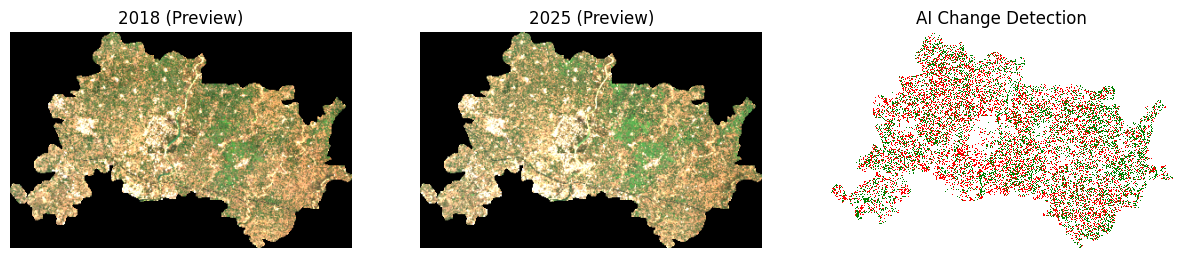

✅ Full Resolution Map Saved to: /content/drive/MyDrive/Gandhinagar_Change_Map.tif
💾 Saving QGIS-Ready file to: /content/drive/MyDrive/Gandhinagar_Change_Map_QGIS.tif...
✅ Success! Open 'Gandhinagar_Change_Map_QGIS.tif' in QGIS.
   (It will automatically show Red/Green regions without manual styling).


In [9]:
import torch
import numpy as np
import rasterio
from rasterio.windows import Window
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
import segmentation_models_pytorch as smp
from tqdm import tqdm

MODEL_PATH = "/content/drive/MyDrive/ahmedabad_segformer_model.pth"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

inference_model = smp.Segformer(
    encoder_name="mit_b3",
    encoder_weights=None,
    in_channels=8,
    classes=3
)

if os.path.exists(MODEL_PATH):
    inference_model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
    inference_model.to(DEVICE)
    inference_model.eval()
    print("✅ Model Loaded.")
else:
    raise FileNotFoundError("❌ Model not found!")

def predict_change_safe(path_before, path_after, model=inference_model, batch_size=32):

    with rasterio.open(path_before) as src1, rasterio.open(path_after) as src2:
        h, w = src1.height, src1.width
        print(f"🔍 Processing {w}x{h} pixels...")

        full_prediction = np.zeros((h, w), dtype=np.uint8)

        chip_size = 256
        stride = 256

        batch_tensors = []
        batch_locations = []

        windows = []
        for y in range(0, h, stride):
            for x in range(0, w, stride):
                windows.append((y, x))

        for i, (y, x) in tqdm(enumerate(windows), total=len(windows), desc="🚀 Inferring"):
            window_h = min(chip_size, h - y)
            window_w = min(chip_size, w - x)
            window = Window(x, y, window_w, window_h)

            img1 = src1.read(window=window)
            img2 = src2.read(window=window)

            pad_h = chip_size - window_h
            pad_w = chip_size - window_w
            if pad_h > 0 or pad_w > 0:
                img1 = np.pad(img1, ((0,0), (0, pad_h), (0, pad_w)), mode='constant')
                img2 = np.pad(img2, ((0,0), (0, pad_h), (0, pad_w)), mode='constant')

            img1 = np.clip(img1, 0, 3000) / 3000.0
            img2 = np.clip(img2, 0, 3000) / 3000.0
            combined = np.concatenate((img1, img2), axis=0).astype(np.float32)

            batch_tensors.append(combined)
            batch_locations.append((y, x, window_h, window_w))

            if len(batch_tensors) == batch_size or i == len(windows) - 1:
                tensor_batch = torch.from_numpy(np.stack(batch_tensors)).to(DEVICE)

                with torch.no_grad():
                    from torch.cuda.amp import autocast
                    with autocast():
                        outputs = model(tensor_batch)
                        preds = torch.argmax(outputs, dim=1).cpu().numpy()

                for j, pred_mask in enumerate(preds):
                    y_loc, x_loc, h_loc, w_loc = batch_locations[j]
                    full_prediction[y_loc:y_loc+h_loc, x_loc:x_loc+w_loc] = pred_mask[:h_loc, :w_loc]

                batch_tensors = []
                batch_locations = []

    return full_prediction

TEST_IMG_2018 = "/content/drive/MyDrive/Gujarat_Satellite_Data_10m/Gandhinagar_2018_10m.tif"
TEST_IMG_2025 = "/content/drive/MyDrive/Gujarat_Satellite_Data_10m/Gandhinagar_2025_10m.tif"

if os.path.exists(TEST_IMG_2018):
    result_map = predict_change_safe(TEST_IMG_2018, TEST_IMG_2025)

    print("🎨 Visualizing Results (Thumbnail)...")

    def get_thumbnail(path, scale_factor=0.05):
        """Reads a tiny version of the huge image to prevent RAM Crash"""
        with rasterio.open(path) as src:
            new_h = int(src.height * scale_factor)
            new_w = int(src.width * scale_factor)

            img = src.read([1, 2, 3], out_shape=(3, new_h, new_w), resampling=Resampling.bilinear)

            img = np.clip(img / 3000.0 * 2.5, 0, 1)
            return np.transpose(img, (1, 2, 0))

    import cv2
    h, w = result_map.shape
    small_h, small_w = int(h * 0.05), int(w * 0.05)
    result_small = cv2.resize(result_map, (small_w, small_h), interpolation=cv2.INTER_NEAREST)

    cmap = ListedColormap(['white', 'red', 'green'])
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 3, 1)
    plt.title("2018 (Preview)")
    plt.imshow(get_thumbnail(TEST_IMG_2018))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("2025 (Preview)")
    plt.imshow(get_thumbnail(TEST_IMG_2025))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("AI Change Detection")
    plt.imshow(result_small, cmap=cmap, interpolation='nearest')
    plt.axis('off')
    plt.show()

    output_path = "/content/drive/MyDrive/Gandhinagar_Change_Map.tif"
    with rasterio.open(TEST_IMG_2018) as src:
        profile = src.profile
        profile.update(count=1, dtype=rasterio.uint8, nodata=0)
        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(result_map, 1)
    print(f"✅ Full Resolution Map Saved to: {output_path}")

    output_path = "/content/drive/MyDrive/Gandhinagar_Change_Map_QGIS.tif"
    print(f"💾 Saving QGIS-Ready file to: {output_path}...")

    with rasterio.open(TEST_IMG_2018) as src:
        profile = src.profile

        profile.update(
            count=1,
            dtype=rasterio.uint8,
            nodata=0,
            compress='lzw'
        )

        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(result_map, 1)

            dst.write_colormap(1, {
                0: (0, 0, 0, 0),
                1: (255, 0, 0, 255),
                2: (0, 255, 0, 255)
            })

    print("✅ Success! Open 'Gandhinagar_Change_Map_QGIS.tif' in QGIS.")
    print("   (It will automatically show Red/Green regions without manual styling).")

✅ Model Loaded for Evaluation.
📊 Evaluating on 7181 validation chips...


Calculating Metrics: 100%|██████████| 898/898 [01:38<00:00,  9.08it/s]



 FINAL EVALUATION REPORT 
------------------------------------------------------------
               Class  Precision  Recall  F1-Score    IoU
           No Change     0.9539  0.9669    0.9604 0.9238
Loss (Deforestation)     0.9022  0.8432    0.8717 0.7726
Gain (Afforestation)     0.8938  0.8775    0.8856 0.7947
------------------------------------------------------------
 Mean IoU (mIoU): 0.8304


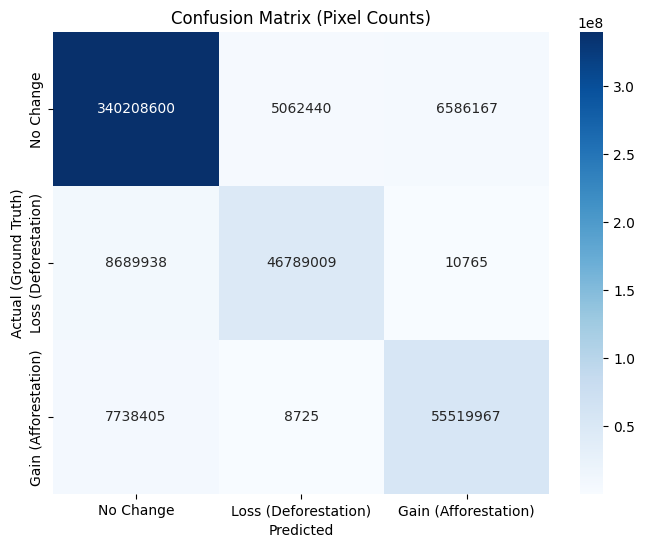

In [11]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import segmentation_models_pytorch as smp
import os

MODEL_PATH = "/content/drive/MyDrive/ahmedabad_segformer_model.pth"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = smp.Segformer(encoder_name="mit_b3", in_channels=8, classes=3)

if os.path.exists(MODEL_PATH):
    model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
    model.to(DEVICE)
    model.eval()
    print("✅ Model Loaded for Evaluation.")
else:
    raise FileNotFoundError("❌ Train the model first!")

def calculate_metrics(loader, model, device):
    print(f"📊 Evaluating on {len(loader.dataset)} validation chips...")

    total_cm = np.zeros((3, 3), dtype=np.int64)

    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Calculating Metrics"):
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            preds_flat = preds.cpu().numpy().flatten()
            masks_flat = masks.cpu().numpy().flatten()

            batch_cm = confusion_matrix(masks_flat, preds_flat, labels=[0, 1, 2])
            total_cm += batch_cm

    return total_cm

conf_matrix = calculate_metrics(val_loader, model, DEVICE)

classes = ['No Change', 'Loss (Deforestation)', 'Gain (Afforestation)']
metrics = []

for i in range(3):
    tp = conf_matrix[i, i]
    fp = conf_matrix[:, i].sum() - tp
    fn = conf_matrix[i, :].sum() - tp
    tn = conf_matrix.sum() - (tp + fp + fn)

    precision = tp / (tp + fp + 1e-10)
    recall = tp / (tp + fn + 1e-10)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-10)
    iou = tp / (tp + fp + fn + 1e-10)

    metrics.append({
        "Class": classes[i],
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "IoU": round(iou, 4)
    })

metrics_df = pd.DataFrame(metrics)
print("\n FINAL EVALUATION REPORT ")
print("-" * 60)
print(metrics_df.to_string(index=False))
print("-" * 60)

mIoU = metrics_df["IoU"].mean()
print(f" Mean IoU (mIoU): {mIoU:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual (Ground Truth)')
plt.title('Confusion Matrix (Pixel Counts)')
plt.show()

In [ ]:
import ee
import geemap

try:
    ee.Initialize(project='satellite-change-detection')
except:
    ee.Authenticate()
    ee.Initialize(project='satellite-change-detection')

gujarat_districts = ee.FeatureCollection("FAO/GAUL/2015/level2") \
    .filter(ee.Filter.eq('ADM1_NAME', 'Gujarat'))

district_names = gujarat_districts.aggregate_array('ADM2_NAME').getInfo()
years = range(2017, 2026)

print(f"Found {len(district_names)} districts covering the whole state.")
print(f"Scheduling exports for years: {list(years)}")

def get_clean_image(roi, year):
    return (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
            .filterBounds(roi)
            .filterDate(f'{year}-01-01', f'{year}-02-20')
            .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
            .median()
            .select(['B2', 'B3', 'B4', 'B8', 'B11', 'B12'])
            .clip(roi)
            .unmask(0)
            .toUint16())

print("\n🚀 Starting Batch Export (With SWIR Bands)...")

task_count = 0

for district in district_names:
    roi = gujarat_districts.filter(ee.Filter.eq('ADM2_NAME', district)).geometry()

    for year in years:
        task_name = f"{district}_{year}_10m"
        print(f"   PLEASE WAIT... Submitting: {task_name}")

        image = get_clean_image(roi, year)

        task = ee.batch.Export.image.toDrive(
            image=image,
            description=task_name,
            folder='Gujarat_Satellite_Data',
            region=roi,
            scale=10,
            crs='EPSG:4326',
            maxPixels=1e13,
            formatOptions={
                'cloudOptimized': True,
                'noData': 0
            }
        )
        task.start()
        task_count += 1

print(f"\n✅ SUCCESS: {task_count} tasks submitted!")
print("👀 Go to https://code.earthengine.google.com/tasks to check progress.")
print("☕ This will take 48-72 hours to complete (Files will be ~30% larger due to extra bands).")

Found 25 districts covering the whole state.
Scheduling exports for years: [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]

🚀 Starting Batch Export (With SWIR Bands)...
   PLEASE WAIT... Submitting: Bharuch_2017_10m
   PLEASE WAIT... Submitting: Bharuch_2018_10m
   PLEASE WAIT... Submitting: Bharuch_2019_10m
   PLEASE WAIT... Submitting: Bharuch_2020_10m
   PLEASE WAIT... Submitting: Bharuch_2021_10m
   PLEASE WAIT... Submitting: Bharuch_2022_10m
   PLEASE WAIT... Submitting: Bharuch_2023_10m
   PLEASE WAIT... Submitting: Bharuch_2024_10m
   PLEASE WAIT... Submitting: Bharuch_2025_10m
   PLEASE WAIT... Submitting: Junagadh_2017_10m
   PLEASE WAIT... Submitting: Junagadh_2018_10m
   PLEASE WAIT... Submitting: Junagadh_2019_10m
   PLEASE WAIT... Submitting: Junagadh_2020_10m
   PLEASE WAIT... Submitting: Junagadh_2021_10m
   PLEASE WAIT... Submitting: Junagadh_2022_10m
   PLEASE WAIT... Submitting: Junagadh_2023_10m
   PLEASE WAIT... Submitting: Junagadh_2024_10m
   PLEASE WAIT...